# Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import numpy as np
import sklearn.preprocessing
import sklearn.cross_validation
import sklearn.svm
import sklearn.metrics

/home/ggomarr/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Read data

In [2]:
work_dir='/home/ggomarr/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/' + \
         'Course data/Part 3 - Classification/Section 16 - Support Vector Machine (SVM)/'
df=pd.read_csv(work_dir+'Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df=df.drop(['User ID','Gender'],axis=1)
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [4]:
X=df[['Age','EstimatedSalary']].values
Y=df['Purchased'].values
X[:5],Y[:5]

(array([[   19, 19000],
        [   35, 20000],
        [   26, 43000],
        [   27, 57000],
        [   19, 76000]]), array([0, 0, 0, 0, 0]))

# Clean up missing data

In [5]:
sum(X!=X),sum(np.isnan(Y))

(array([0, 0]), 0)

In [9]:
# imputer=sklearn.preprocessing.Imputer(missing_values='NaN',strategy='mean',axis=0).fit(X[:,1:3])
# X[:,1:3]=imputer.transform(X[:,1:3])
# X

# Create dummy variables

In [9]:
# label_encoder=sklearn.preprocessing.LabelEncoder().fit(X[:,0])
# X[:,0]=label_encoder.transform(X[:,0])
# one_hot_encoder=sklearn.preprocessing.OneHotEncoder(categorical_features=[0]).fit(X)
# X=one_hot_encoder.transform(X).toarray()
# X

# Avoid the dummy variable trap

In [9]:
# X=X=np.delete(X,0,1)
# X

# Create categorical labels

In [11]:
# label_encoder=sklearn.preprocessing.LabelEncoder().fit(Y)
# Y=label_encoder.transform(Y)
# Y

# Feature scaling

In [6]:
X_scaler=sklearn.preprocessing.StandardScaler().fit(X)
X_scaled=X_scaler.transform(X)
X_scaled[:5]
# X_scaler,Y_scaler=sklearn.preprocessing.StandardScaler().fit(X),sklearn.preprocessing.StandardScaler().fit(Y)
# X_scaled,Y_scaled=X_scaler.transform(X),Y_scaler.transform(Y)
# X_scaled,Y_scaled

/home/ggomarr/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059]])

# Train/test split

In [7]:
X_train,X_test,Y_train,Y_test=sklearn.cross_validation.train_test_split(X_scaled,Y,
                                                                        test_size=0.25,random_state=0)
Y_train.size,Y_test.size

(300, 100)

In [32]:
# X_train,Y_train

In [34]:
# X_test,Y_test

# Support Vector Machines - sklearn.svm.SVC()

In [15]:
svm=sklearn.svm.SVC(kernel='linear',random_state=0).fit(X_train,Y_train)
svm.score(X_train,Y_train),svm.score(X_test,Y_test)

(0.82333333333333336, 0.90000000000000002)

In [16]:
sklearn.metrics.confusion_matrix(Y_test,svm.predict(X_test))

array([[66,  2],
       [ 8, 24]])

In [17]:
print(sklearn.metrics.classification_report(Y_test,svm.predict(X_test)))

             precision    recall  f1-score   support

          0       0.89      0.97      0.93        68
          1       0.92      0.75      0.83        32

avg / total       0.90      0.90      0.90       100



In [18]:
def range_plot_X(X,num=100,ext=0.1):
    max_X,min_X=max(X),min(X)
    delta=max_X-min_X
    max_X,min_X=max_X+ext*delta,min_X-ext*delta
    delta=(max_X-min_X)/(num-1)
    return np.array(np.arange(min_X,max_X+delta,delta)[:num].reshape((num,1)))

In [19]:
X_plot,Y_plot=np.meshgrid(range_plot_X(X_scaled[:,0],num=1000),range_plot_X(X_scaled[:,1],num=1000))
cmap_lst=('red','green')

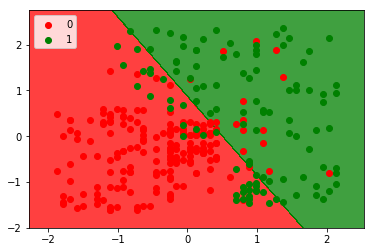

In [20]:
plt.contourf(X_plot,Y_plot,svm.predict(np.array([X_plot.ravel(),Y_plot.ravel()]).T).reshape(X_plot.shape),
             alpha=0.75,cmap=matplotlib.colors.ListedColormap(cmap_lst))
plt.scatter(X_train[Y_train==0,0],X_train[Y_train==0,1],c=cmap_lst[0],label=0)
plt.scatter(X_train[Y_train==1,0],X_train[Y_train==1,1],c=cmap_lst[1],label=1)
plt.legend()
plt.show()

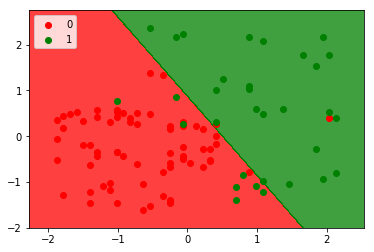

In [22]:
plt.contourf(X_plot,Y_plot,svm.predict(np.array([X_plot.ravel(),Y_plot.ravel()]).T).reshape(X_plot.shape),
             alpha=0.75,cmap=matplotlib.colors.ListedColormap(cmap_lst))
plt.scatter(X_test[Y_test==0,0],X_test[Y_test==0,1],c=cmap_lst[0],label=0)
plt.scatter(X_test[Y_test==1,0],X_test[Y_test==1,1],c=cmap_lst[1],label=1)
plt.legend()
plt.show()